In [1]:
import pandas as pd
import numpy as np

In [12]:
data = pd.read_csv('sonar.all-data.csv')
data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [3]:
pd.set_option('display.max_rows',500)
data.dtypes

0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
0.0986    float64
0.1539    float64
0.1601    float64
0.3109    float64
0.2111    float64
0.1609    float64
0.1582    float64
0.2238    float64
0.0645    float64
0.0660    float64
0.2273    float64
0.3100    float64
0.2999    float64
0.5078    float64
0.4797    float64
0.5783    float64
0.5071    float64
0.4328    float64
0.5550    float64
0.6711    float64
0.6415    float64
0.7104    float64
0.8080    float64
0.6791    float64
0.3857    float64
0.1307    float64
0.2604    float64
0.5121    float64
0.7547    float64
0.8537    float64
0.8507    float64
0.6692    float64
0.6097    float64
0.4943    float64
0.2744    float64
0.0510    float64
0.2834    float64
0.2825    float64
0.4256    float64
0.2641    float64
0.1386    float64
0.1051    float64
0.1343    float64
0.0383    float64
0.0324    float64
0.0232    float64
0.0027    float64
0.0065    float64
0.0159    float64
0.0072    float64
0.0167    

In [4]:
data.groupby('R').size()

R
M    111
R     96
dtype: int64

# MODEL EVALUATION

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt

# Train Test Split

In [7]:
arr = data.values

X = arr[:,0:-1]
Y = arr [:,-1]

testing_size = 0.2
X

array([[0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       [0.01, 0.0171, 0.0623, ..., 0.0044, 0.004, 0.0117],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049, ..., 0.0079, 0.0036, 0.0048],
       [0.026, 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]], dtype=object)

In [8]:
X= data.drop('R',axis=1)
Y= data['R']
Y

0      R
1      R
2      R
3      R
4      R
5      R
6      R
7      R
8      R
9      R
10     R
11     R
12     R
13     R
14     R
15     R
16     R
17     R
18     R
19     R
20     R
21     R
22     R
23     R
24     R
25     R
26     R
27     R
28     R
29     R
30     R
31     R
32     R
33     R
34     R
35     R
36     R
37     R
38     R
39     R
40     R
41     R
42     R
43     R
44     R
45     R
46     R
47     R
48     R
49     R
50     R
51     R
52     R
53     R
54     R
55     R
56     R
57     R
58     R
59     R
60     R
61     R
62     R
63     R
64     R
65     R
66     R
67     R
68     R
69     R
70     R
71     R
72     R
73     R
74     R
75     R
76     R
77     R
78     R
79     R
80     R
81     R
82     R
83     R
84     R
85     R
86     R
87     R
88     R
89     R
90     R
91     R
92     R
93     R
94     R
95     R
96     M
97     M
98     M
99     M
100    M
101    M
102    M
103    M
104    M
105    M
106    M
107    M
108    M
109    M
110    M
1

In [71]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=testing_size,random_state=42)

In [72]:
DT = DecisionTreeClassifier(max_depth=2)
DT.fit(X_train,Y_train)
y_pred = DT.predict(X_test)
acc=metrics.accuracy_score(Y_test,y_pred)*100
acc

69.04761904761905

0.7380952380952381
0


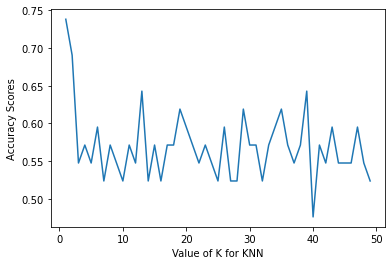

In [73]:
DT_range=list(range(1,50))
acc=[]

for md in DT_range:
    DT = DecisionTreeClassifier(max_depth=md)
    DT.fit(X_train,Y_train)
    y_pred = DT.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test,y_pred))
print(max(acc))
print(acc.index(max(acc)))
plt.plot(DT_range,acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Scores')
plt.show()

In [99]:
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
y_pred = DT.predict(X_test)
acc=metrics.accuracy_score(Y_test,y_pred)*100
acc

76.19047619047619

In [25]:
models=[]
models.append(('DT',DecisionTreeClassifier()))
models.append(('RT',RandomForestClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LR',LogisticRegression()))
models.append(('GNB',GaussianNB()))

In [26]:
models

[('DT', DecisionTreeClassifier()),
 ('RT', RandomForestClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('LR', LogisticRegression()),
 ('GNB', GaussianNB())]

In [27]:
for name,model in models:
    print(name)
    print(model)

DT
DecisionTreeClassifier()
RT
RandomForestClassifier()
KNN
KNeighborsClassifier()
LR
LogisticRegression()
GNB
GaussianNB()


In [28]:
names=[]
results=[]

for name,model in models:
    obj=model
    names.append(name)
    obj.fit(X_train,Y_train)
    y_pred = obj.predict(X_test)
    results.append(metrics.accuracy_score(Y_test,y_pred)*100)
    
print(results)

[80.95238095238095, 83.33333333333334, 80.95238095238095, 76.19047619047619, 66.66666666666666]


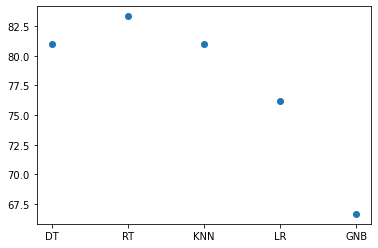

In [29]:
plt.scatter(names,results)

# DEEP LEARNING

In [3]:
import tensorflow as tf
from tensorflow import keras

In [18]:
# data['R'].replace(to_replace=['R','M'],value=[0,1],inplace=True)
# data.tail()
X = data.drop('R',axis=1)
Y = data['R']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


print(Y_train)

12     0
115    1
82     0
171    1
11     0
      ..
32     0
182    1
201    1
151    1
194    1
Name: R, Length: 165, dtype: int64


In [9]:
ann_model = keras.Sequential(
    [
        keras.layers.Dense(24,input_dim=60, activation="relu"),
        keras.layers.Dense(12, activation="relu"),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dense(1,activation="sigmoid" ),
    ]
)

ann_model.compile(
  optimizer = keras.optimizers.Adam(),
  loss = 'binary_crossentropy',
metrics = ['accuracy']
)

ann_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 24)                1464      
                                                                 
 dense_13 (Dense)            (None, 12)                300       
                                                                 
 dense_14 (Dense)            (None, 8)                 104       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,877
Trainable params: 1,877
Non-trainable params: 0
_________________________________________________________________


In [20]:
ann_model.fit(X_train,Y_train,epochs=20)

Epoch 1/20
6/6 [==============================] - 3s 14ms/step - loss: 0.7315 - accuracy: 0.4545
Epoch 2/20
6/6 [==============================] - 0s 3ms/step - loss: 0.7045 - accuracy: 0.4545
Epoch 3/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4727
Epoch 4/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5030
Epoch 5/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5515
Epoch 6/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.6424
Epoch 7/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.6788
Epoch 8/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6746 - accuracy: 0.6788
Epoch 9/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.7333
Epoch 10/20
6/6 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.7273
Epoch 11/20
6/6 [=====================

In [21]:
loss , acc = ann_model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 0s/step - loss: 0.5807 - accuracy: 0.7857


In [33]:
print(loss)
print(acc)

0.5806764960289001
0.7857142686843872


In [32]:
results.append(acc*100)
names.append('ANN')

print(results)
print(names)

[80.95238095238095, 83.33333333333334, 80.95238095238095, 76.19047619047619, 66.66666666666666, 78.57142686843872, 78.57142686843872]
['DT', 'RT', 'KNN', 'LR', 'GNB', 'Fahad', 'ANN']


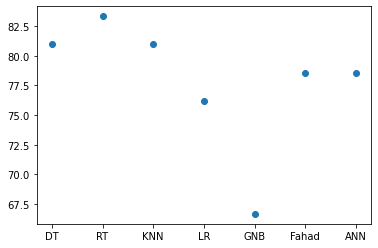

In [34]:
plt.scatter(names,results)